## Tensorboard

In [2]:
# importing libaries

import tensorflow as tf
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

# ignore warnings

import warnings
warnings.filterwarnings('ignore')

# igonre warnings in output
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)





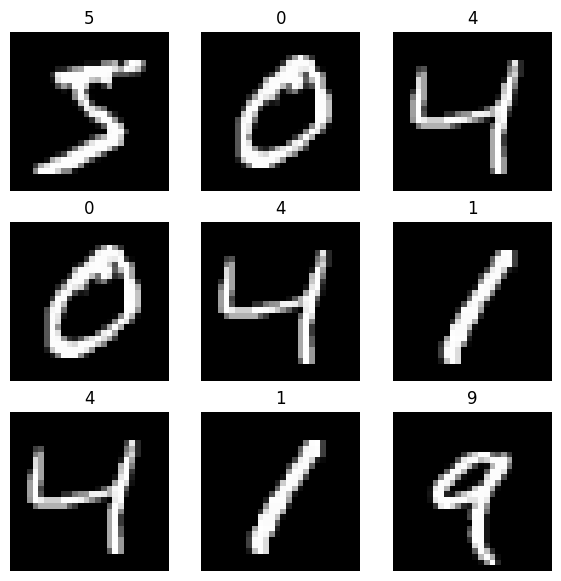

In [3]:
# loading MNIST data

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalizing data betwwen 0 and 1

x_train, x_test = x_train / 255.0, x_test / 255.0

# plotting fitst 9 images

import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 3, figsize=(7, 7))

for i in range(3):
    for j in range(3):
        ax[i, j].imshow(x_train[i+j], cmap='gray')
        ax[i, j].set_title(y_train[i+j])
        ax[i, j].axis('off')

plt.show()

In [4]:
# creating model

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# compiling model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# training the model

history =  model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# evaluate the model

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')





Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9020 - loss: 0.3153 - val_accuracy: 0.9840 - val_loss: 0.0456
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9832 - loss: 0.0539 - val_accuracy: 0.9870 - val_loss: 0.0389
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9895 - loss: 0.0346 - val_accuracy: 0.9918 - val_loss: 0.0265
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9922 - loss: 0.0253 - val_accuracy: 0.9906 - val_loss: 0.0286
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9929 - loss: 0.0204 - val_accuracy: 0.9918 - val_loss: 0.0253
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9944 - loss: 0.0168 - val_accuracy: 0.9914 - val_loss: 0.0293
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9956 - loss: 0.0132 - val_accuracy: 0.9906 - val_loss: 0.0328
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9957 -

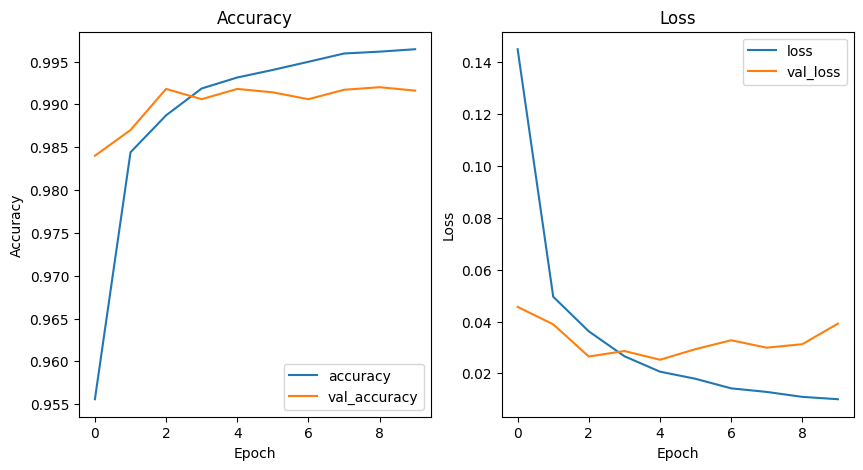

In [5]:
# plotting the accuracy and loss

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss')

plt.show()

In [6]:
# lets do it in tensorboard


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# compiling model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
# creating callback for tensorboard

tensorboard_callback = TensorBoard(log_dir='logs',histogram_freq=1)

history =  model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test),callbacks=[tensorboard_callback])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.8976 - loss: 0.3213 - val_accuracy: 0.9860 - val_loss: 0.0426
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9832 - loss: 0.0554 - val_accuracy: 0.9899 - val_loss: 0.0293
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9879 - loss: 0.0359 - val_accuracy: 0.9896 - val_loss: 0.0326
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9913 - loss: 0.0278 - val_accuracy: 0.9919 - val_loss: 0.0250
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9931 - loss: 0.0203 - val_accuracy: 0.9913 - val_loss: 0.0315
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9951 - loss: 0.0162 - val_accuracy: 0.9929 - val_loss: 0.0262
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9956 - loss: 0.0137 - val_accuracy: 0.9920 - val_loss: 0.0285
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9957 -

In [10]:
# activating tensorboard

%load_ext tensorboard


%tensorboard --logdir logs



The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 11752), started 0:21:28 ago. (Use '!kill 11752' to kill it.)